In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_csv("DataCleaned.csv")
df2=pd.read_csv("DataCleanedTest.csv")

In [3]:
df['OdoBin'] = pd.cut(df['VehOdo'].astype(int), 15, right=False).cat.codes
df['MMRBin'] = pd.cut(df['MMRAcquisitionAuctionAveragePrice'], 15, right=False).cat.codes
df['WarrantyBin'] = pd.cut(df['WarrantyCost'], 15, right=False).cat.codes
df['CostBin'] = pd.cut(df['VehBCost'], 15, right=False).cat.codes

df.drop(['VehOdo', 'WarrantyCost', 'VehBCost', 'MMRAcquisitionAuctionAveragePrice', 'MMRCurrentAuctionAveragePrice', 'RoundVehBCost', 'Unnamed: 0'], axis=1, inplace=True)

df.head()

,IsBadBuy,Auction,VehYear,VehicleAge,Make,Trim,Color,Transmission,WheelTypeID,Nationality,Size,VNST,IsOnlineSale,OdoBin,MMRBin,WarrantyBin,CostBin
0,1,1,2008,2,KIA,EX,BLUE,2,2.0,2,1,FL,0,7,7,0,6
1,0,2,2006,3,DODGE,SXT,SILVER,2,2.0,1,1,FL,0,11,5,7,3
2,0,3,2008,2,DODGE,SE,BLACK,2,2.0,1,1,OK,0,5,8,1,8
3,0,3,2005,4,FORD,S,BROWN,2,2.0,1,1,AZ,0,10,4,7,4
4,0,2,2005,4,CHRYSLER,Bas,BLUE,2,1.0,1,1,TX,0,9,5,7,5


In [4]:
df2['OdoBin'] = pd.cut(df2['VehOdo'].astype(int), 15, right=False)
df2['MMRBin'] = pd.cut(df2['MMRAcquisitionAuctionAveragePrice'], 15, right=False)
df2['WarrantyBin'] = pd.cut(df2['WarrantyCost'], 15, right=False)
df2['CostBin'] = pd.cut(df2['VehBCost'], 15, right=False)

df2.drop(['VehOdo', 'WarrantyCost', 'VehBCost', 'MMRAcquisitionAuctionAveragePrice', 'MMRCurrentAuctionAveragePrice', 'RoundVehBCost', 'Unnamed: 0'], axis=1, inplace=True)

df2.head()

,IsBadBuy,Auction,VehYear,VehicleAge,Make,Trim,Color,Transmission,WheelTypeID,Nationality,Size,VNST,IsOnlineSale,OdoBin,MMRBin,WarrantyBin,CostBin
0,0,2,2003,7,CHEVROLET,150,BLUE,2,1.0,1,2,AZ,0,"[70716.0, 77606.0)","[7692.067, 8507.2)","[1552.6, 1708.4)","[10885.667, 11509.215)"
1,0,3,2006,4,FORD,Bas,BLACK,1,1.0,1,4,NC,0,"[70716.0, 77606.0)","[8507.2, 9322.333)","[773.6, 929.4)","[7199.667, 7814.0)"
2,0,2,2004,5,DODGE,ES,WHITE,2,1.0,1,1,AZ,0,"[70716.0, 77606.0)","[2801.267, 3616.4)","[1241.0, 1396.8)","[5356.667, 5971.0)"
3,0,3,2004,6,HYUNDAI,Bas,BLUE,1,1.0,2,4,CO,0,"[77606.0, 84496.0)","[3616.4, 4431.533)","[773.6, 929.4)","[4742.333, 5356.667)"
4,0,2,2004,5,CHEVROLET,Nor,GREEN,2,1.0,1,1,CO,0,"[77606.0, 84496.0)","[6061.8, 6876.933)","[1085.2, 1241.0)","[6585.333, 7199.667)"


In [5]:
df = df.dropna()

In [6]:
attributes = [col for col in df.columns if 
              col == 'VehicleAge' 
              or col == 'Transmission' 
              or col == 'WheelTypeID' 
              or col == 'Nationality' 
              or col == 'Size'
              #or col == 'OdoBin'
              #or col == 'MMRBin'
              #or col == 'CostBin'
             ]
#classes = [col for col in df.columns if col == 'IsBadBuy']
X = df[attributes].values
y = df['IsBadBuy']

In [7]:
df[attributes].isnull().sum()

VehicleAge      0
Transmission    0
WheelTypeID     0
Nationality     0
Size            0
dtype: int64

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [9]:
attributes2 = [col for col in df.columns if 
              col == 'VehicleAge' 
              or col == 'Transmission' 
              or col == 'WheelTypeID' 
              or col == 'Nationality' 
              or col == 'Size'
             ]
#classes = [col for col in df.columns if col == 'IsBadBuy']
X_test = df[attributes2].values
y_test = df['IsBadBuy']

In [10]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, class_weight=None)


clf.fit(X, y)
#report(random_search.cv_results_, n_top=3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [12]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix

In [13]:
y_pred = clf.predict(X_test)

In [14]:
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Test Accuracy 0.905486752808558
Test F1-score [0.95035947 0.01596806]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     47210
           1       0.69      0.01      0.02      4952

    accuracy                           0.91     52162
   macro avg       0.80      0.50      0.48     52162
weighted avg       0.89      0.91      0.86     52162



array([[47192,    18],
       [ 4912,    40]])

In [15]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)
roc_auc

0.5038481346364626


0.5038481346364626

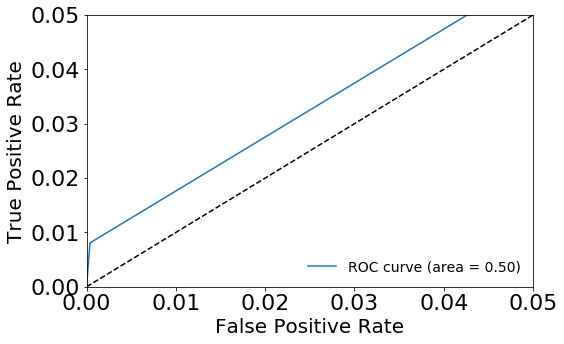

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 0.05])
plt.ylim([0.0, 0.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()